In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import RidgeClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
TRAINING = True

In [3]:
def plot_confusion_matrix(y_test, y_pred, class_names=None, figsize=(8, 6)):
    
    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # If class names are not provided, generate generic labels
    if class_names is None:
        class_names = [f"Class {i}" for i in range(cm.shape[0])]
    
    # Create a heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    
    # Labels and title
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

In [4]:
def save_model(model, model_name:str):
    file_name = f'{model_name}.model'
    joblib.dump(model,file_name)
    
def load_model(model_name):
    return joblib.load(f'{model_name}.model')
    
def print_accuracy(y_pred, y_test, model_name:str = None):
    if model_name:
        print(f"This is the result for {model_name}:")
    print(f"The accuracy score is: {accuracy_score(y_pred, y_test)}")
    print(f"THe MSE is: {mean_squared_error(y_pred, y_test)}")
    plot_confusion_matrix(y_test, y_pred, class_names=['Loss', 'Win'])
    print("----------------------------------------------------")
    return

In [5]:
'''
def get_model(model_code):
    model_list =
    {
        "rf" : "random forest"
        "xgb" : "xgboost"
        "cbt" : "catboost"
        "lgb": "lightgbm"
    }
'''

'\ndef get_model(model_code):\n    model_list =\n    {\n        "rf" : "random forest"\n        "xgb" : "xgboost"\n        "cbt" : "catboost"\n        "lgb": "lightgbm"\n    }\n'

# Data import and cleaning

In [38]:
df = pd.read_csv("nba_games2.csv", index_col =0)

In [39]:
df.describe()

,mp,mp.1,fg,fga,fg%,3p,3pa,3p%,ft,fta,...,ast%_max_opp,stl%_max_opp,blk%_max_opp,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,total_opp,home_opp,season
count,8898.000000,8898.000000,8898.000000,8898.000000,8898.000000,8898.000000,8898.000000,8898.000000,8898.000000,8898.000000,...,8898.000000,8898.000000,8898.000000,8898.000000,8898.000000,8898.000000,8898.000000,8898.000000,8898.000000,8898.000000
mean,241.550910,241.550910,41.122275,88.137671,0.467570,12.471454,34.655878,0.358991,17.570241,22.569004,...,42.284547,5.893358,9.348269,39.898539,35.086244,183.091032,121.607327,112.286244,0.500000,2021.748033
std,6.756057,6.756057,5.193318,7.034097,0.055022,3.904146,6.939569,0.084476,5.859628,7.037673,...,14.499554,4.612331,7.106820,21.755159,8.580759,41.496820,11.053448,12.490923,0.500028,1.033174
min,240.000000,240.000000,23.000000,64.000000,0.277000,2.000000,10.000000,0.077000,2.000000,2.000000,...,15.400000,0.000000,0.000000,4.600000,22.000000,102.000000,85.000000,73.000000,0.000000,2020.000000
25%,240.000000,240.000000,38.000000,83.000000,0.430000,10.000000,30.000000,0.303000,13.000000,18.000000,...,32.600000,3.700000,5.300000,25.000000,30.200000,152.000000,114.000000,104.000000,0.000000,2021.000000
50%,240.000000,240.000000,41.000000,88.000000,0.467000,12.000000,34.000000,0.357000,17.000000,22.000000,...,39.500000,4.900000,7.700000,33.300000,33.300000,173.000000,122.000000,112.000000,0.500000,2022.000000
75%,240.000000,240.000000,45.000000,93.000000,0.506000,15.000000,39.000000,0.415000,21.000000,27.000000,...,48.300000,6.700000,11.200000,50.000000,37.500000,207.000000,129.000000,121.000000,1.000000,2023.000000
max,315.000000,315.000000,65.000000,121.000000,0.687000,29.000000,63.000000,0.684000,43.000000,52.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,300.000000,162.000000,176.000000,1.000000,2023.000000


In [8]:
df.head()

,mp,mp.1,fg,fga,fg%,3p,3pa,3p%,ft,fta,...,tov%_max_opp,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,season,date,won
0,240.0,240.0,42.0,86.0,0.488,6.0,23.0,0.261,17.0,23.0,...,20.5,33.7,146.0,117.0,LAL,117,1,2020,2020-01-01,False
1,240.0,240.0,43.0,90.0,0.478,7.0,28.0,0.250,24.0,34.0,...,100.0,39.1,204.0,125.0,PHO,107,0,2020,2020-01-01,True
2,240.0,240.0,34.0,91.0,0.374,15.0,46.0,0.326,21.0,28.0,...,33.8,36.8,176.0,106.0,MIL,106,1,2020,2020-01-01,False
3,240.0,240.0,40.0,94.0,0.426,9.0,36.0,0.250,17.0,26.0,...,17.0,38.4,211.0,103.0,MIN,104,0,2020,2020-01-01,True
4,240.0,240.0,37.0,94.0,0.394,10.0,32.0,0.313,9.0,15.0,...,19.4,28.6,230.0,103.0,NYK,117,1,2020,2020-01-01,False


In [9]:
# Sort data and drop meaningless columns
df = df.sort_values("date")
df = df.reset_index(drop=True)
df = df.drop(["mp.1", "mp_max.1","mp_opp.1", "mp_max_opp.1","index_opp"],axis=1)

In [10]:
# Add target data for model training
def add_target(team):
    team["target"] = team["won"].shift(-1)
    return team

df = df.groupby("team", group_keys=False).apply(add_target)
df["target"][pd.isnull(df["target"])] = 2
df["target"] = df["target"].astype(int, errors ="ignore")

/var/folders/fq/_3b4tsjj5sv_d2gh65lk7ps40000gn/T/ipykernel_29827/2141235060.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["target"][pd.isnull(df["target"])] = 2


In [11]:
# Get rid of data with NA values
nulls = pd.isnull(df)
nulls = nulls.sum()
nulls = nulls[nulls>0]

valid_columns = df.columns[~df.columns.isin(nulls.index)]
df = df[valid_columns].copy()

# Winning Rate

In [12]:
def add_value_in_bar(ax, bars):
    # Add the winning rate inside each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,  # X position
            yval,  # Y position
            f"{yval:.2f}",  # Text to display (formatted to 2 decimal places)
            ha="center",  # Center alignment
            va="bottom"  # Position text at the bottom of the value
        )

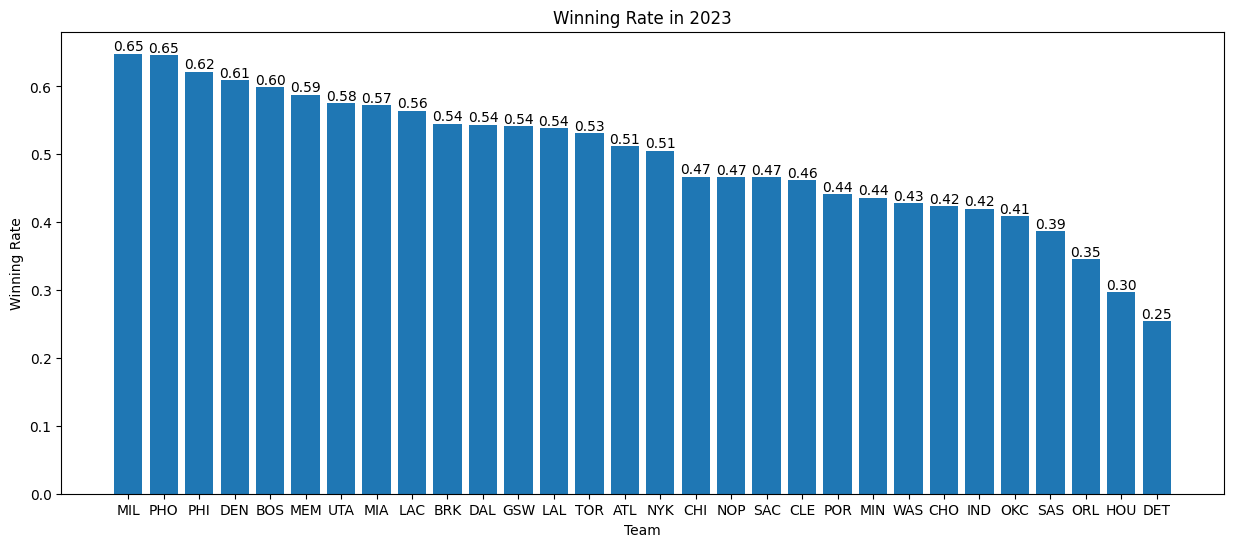

In [13]:
df_2023 = df[df["season"] == 2023]
df_team = df[["won", "team"]].groupby(["team"]).mean()
df_team = df_team.sort_values('won', ascending=False)

fig, ax = plt.subplots(figsize=(15, 6))

bars = ax.bar(df_team.index,df_team["won"])
add_value_in_bar(ax, bars)

ax.set_title("Winning Rate in 2023")
ax.set_xlabel("Team")
ax.set_ylabel("Winning Rate")

plt.show()

# Winning Rate based on home or guest team

In [14]:
df_team = df[["won","team","home"]].groupby(["team","home"]).mean()
df_team.head(6)

won
team home          
ATL  0     0.400000
     1     0.622517
BOS  0     0.561404
     1     0.635838
BRK  0     0.506757
     1     0.581699

/var/folders/fq/_3b4tsjj5sv_d2gh65lk7ps40000gn/T/ipykernel_29827/2923667446.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(home_sorted.index, rotation=90)
/var/folders/fq/_3b4tsjj5sv_d2gh65lk7ps40000gn/T/ipykernel_29827/2923667446.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(guest_sorted.index, rotation=90)


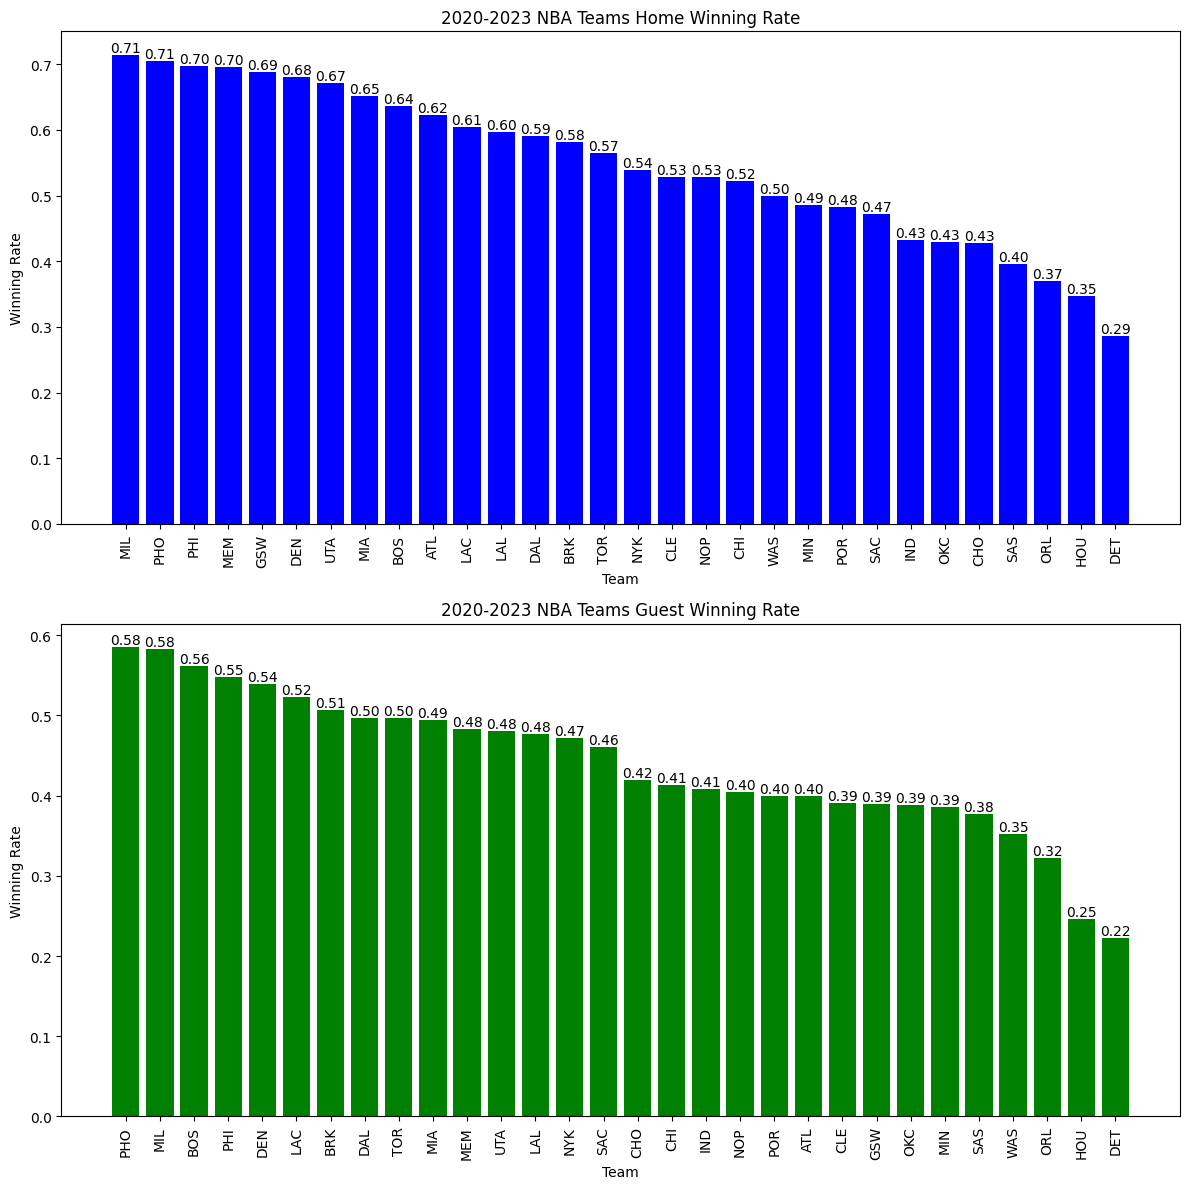

In [15]:
# Assuming df_team is your dataframe after groupby
df_team = df[["won", "team", "home"]].groupby(["team", "home"]).mean()

# Unstack the 'home' column so we have separate columns for home and away teams
df_team_unstacked = df_team.unstack()

# Rename the columns for clarity
df_team_unstacked.columns = ['guest', 'home']

# Sorting by home and guest win rates separately
home_sorted = df_team_unstacked.sort_values('home', ascending=False)
guest_sorted = df_team_unstacked.sort_values('guest', ascending=False)

# Create subplots: 2 rows, 1 column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plotting the home winning rate on the left (ax1)
bars = ax1.bar(home_sorted.index, home_sorted['home'], color='blue', label='Home Win Rate')
add_value_in_bar(ax1, bars)

ax1.set_xlabel('Team')
ax1.set_ylabel('Winning Rate')
ax1.set_title('2020-2023 NBA Teams Home Winning Rate')
ax1.set_xticklabels(home_sorted.index, rotation=90)

# Plotting the guest winning rate on the right (ax2)
bars = ax2.bar(guest_sorted.index, guest_sorted['guest'], color='green', label='Guest Win Rate')
add_value_in_bar(ax2, bars)

ax2.set_xlabel('Team')
ax2.set_ylabel('Winning Rate')
ax2.set_title('2020-2023 NBA Teams Guest Winning Rate')
ax2.set_xticklabels(guest_sorted.index, rotation=90)


# Adjust layout for better spacing
plt.tight_layout()
plt.show()


/var/folders/fq/_3b4tsjj5sv_d2gh65lk7ps40000gn/T/ipykernel_29827/83745022.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(home_sorted.index, rotation=90)
/var/folders/fq/_3b4tsjj5sv_d2gh65lk7ps40000gn/T/ipykernel_29827/83745022.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(guest_sorted.index, rotation=90)


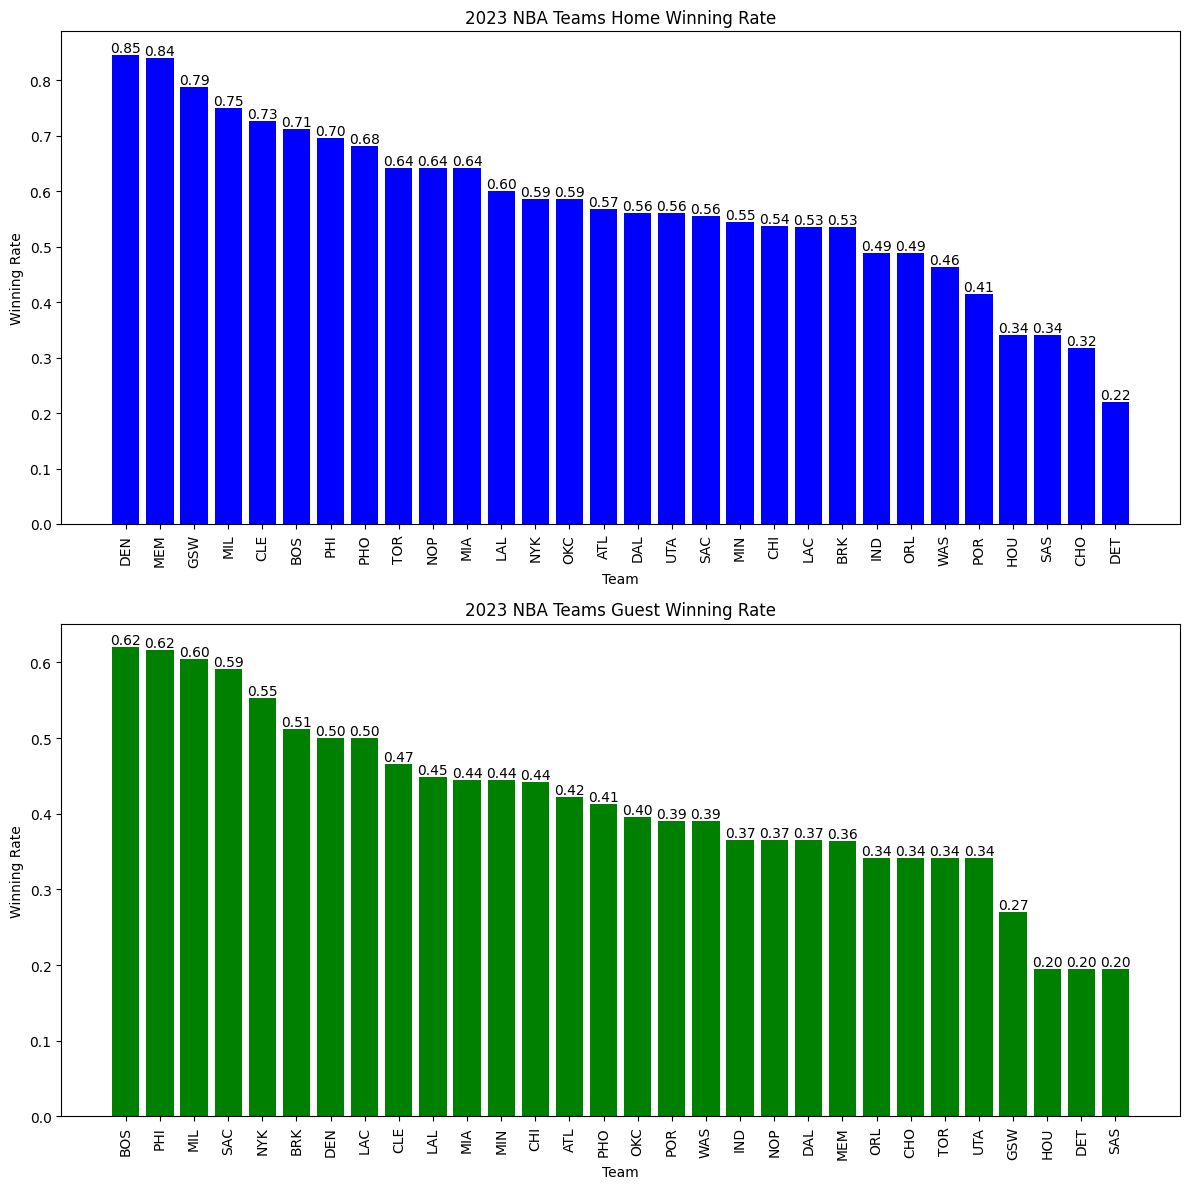

In [16]:
# Assuming df_team is your dataframe after groupby
df_team = df_2023[["won", "team", "home"]].groupby(["team", "home"]).mean()

# Unstack the 'home' column so we have separate columns for home and away teams
df_team_unstacked = df_team.unstack()

# Rename the columns for clarity
df_team_unstacked.columns = ['guest', 'home']

# Sorting by home and guest win rates separately
home_sorted = df_team_unstacked.sort_values('home', ascending=False)
guest_sorted = df_team_unstacked.sort_values('guest', ascending=False)

# Create subplots: 2 rows, 1 column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plotting the home winning rate on the left (ax1)
bars = ax1.bar(home_sorted.index, home_sorted['home'], color='blue', label='Home Win Rate')
add_value_in_bar(ax1, bars)

ax1.set_xlabel('Team')
ax1.set_ylabel('Winning Rate')
ax1.set_title('2023 NBA Teams Home Winning Rate')
ax1.set_xticklabels(home_sorted.index, rotation=90)

# Plotting the guest winning rate on the right (ax2)
bars = ax2.bar(guest_sorted.index, guest_sorted['guest'], color='green', label='Guest Win Rate')
add_value_in_bar(ax2, bars)

ax2.set_xlabel('Team')
ax2.set_ylabel('Winning Rate')
ax2.set_title('2023 NBA Teams Guest Winning Rate')
ax2.set_xticklabels(guest_sorted.index, rotation=90)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Scaling

In [17]:
# Remove columns that are not going to be scaled
removed_columns_df = ["season", "date","won","target","team","team_opp"]

# Get the columns we want to scale on
selected_columns_df = df.columns[~df.columns.isin(removed_columns_df)]

# Rescale the data
scaler = MinMaxScaler()
df[selected_columns_df] = scaler.fit_transform(df[selected_columns_df])

# Rolling

In [18]:
df_rolling = df[list(selected_columns_df) + ["won", "team", "season"]]

def find_team_averages(team):
    numeric_columns = team.select_dtypes(include=[np.number])
    rolling = numeric_columns.rolling(10).mean()
    # Reattach the non-numeric columns (team, season)
    rolling[["team", "season"]] = team[["team", "season"]]
    return rolling

df_rolling = df_rolling.groupby(["team", "season"], group_keys=False).apply(find_team_averages)

In [19]:
rolling_cols = [f"{col}_10" for col in df_rolling.columns]
df_rolling.columns = rolling_cols
df_rolling = pd.concat([df, df_rolling], axis=1)
df_rolling = df_rolling.dropna()

In [20]:
df_rolling

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,stl%_max_opp_10,blk%_max_opp_10,tov%_max_opp_10,usg%_max_opp_10,ortg_max_opp_10,drtg_max_opp_10,total_opp_10,home_opp_10,season_10,team_10
244,0.0,0.357143,0.526316,0.309756,0.444444,0.754717,0.334432,0.487805,0.50,0.735714,...,0.0466,0.1085,0.370126,0.133205,0.420707,0.400000,0.370874,0.5,2020,MIN
248,0.0,0.380952,0.473684,0.370732,0.370370,0.415094,0.490939,0.341463,0.38,0.660000,...,0.0366,0.0909,0.324004,0.156795,0.397980,0.424675,0.395146,0.8,2020,POR
250,0.0,0.476190,0.333333,0.587805,0.185185,0.226415,0.397035,0.585366,0.68,0.602857,...,0.0518,0.0611,0.294130,0.151410,0.352020,0.480519,0.363107,0.5,2020,OKC
253,0.0,0.285714,0.421053,0.295122,0.148148,0.283019,0.268534,0.219512,0.32,0.444286,...,0.0490,0.0898,0.315199,0.174872,0.393434,0.377922,0.433010,0.5,2020,NYK
255,0.0,0.452381,0.561404,0.392683,0.481481,0.603774,0.461285,0.439024,0.40,0.870000,...,0.0533,0.1213,0.295702,0.164231,0.340909,0.445455,0.378641,0.4,2020,BOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8893,0.0,0.261905,0.491228,0.226829,0.333333,0.471698,0.390445,0.317073,0.34,0.698571,...,0.0454,0.0872,0.233124,0.245256,0.467172,0.514286,0.318447,0.6,2023,MIA
8894,0.0,0.380952,0.263158,0.529268,0.444444,0.339623,0.696870,0.341463,0.38,0.660000,...,0.0458,0.0883,0.319811,0.340769,0.387374,0.589610,0.303883,0.5,2023,DEN
8895,0.0,0.285714,0.245614,0.419512,0.222222,0.283019,0.400329,0.365854,0.36,0.785714,...,0.0452,0.0910,0.262998,0.246154,0.457071,0.487013,0.310680,0.5,2023,MIA
8896,0.0,0.238095,0.561404,0.163415,0.259259,0.471698,0.296540,0.292683,0.28,0.821429,...,0.0465,0.1108,0.257547,0.237949,0.480303,0.462338,0.300000,0.5,2023,MIA


In [21]:
def shift_col(team, col_name):
    next_col = team[col_name].shift(-1)
    return next_col

def add_col(df, col_name):
    return df.groupby("team", group_keys=False).apply(lambda x: shift_col(x, col_name))

df_rolling["home_next"] = add_col(df_rolling, "home")
df_rolling["team_opp_next"] = add_col(df_rolling, "team_opp")
df_rolling["date_next"] = add_col(df_rolling, "date")

In [22]:
df_rolling

,mp,fg,fga,fg%,3p,3pa,3p%,ft,fta,ft%,...,usg%_max_opp_10,ortg_max_opp_10,drtg_max_opp_10,total_opp_10,home_opp_10,season_10,team_10,home_next,team_opp_next,date_next
244,0.0,0.357143,0.526316,0.309756,0.444444,0.754717,0.334432,0.487805,0.50,0.735714,...,0.133205,0.420707,0.400000,0.370874,0.5,2020,MIN,1.0,DEN,2020-01-20
248,0.0,0.380952,0.473684,0.370732,0.370370,0.415094,0.490939,0.341463,0.38,0.660000,...,0.156795,0.397980,0.424675,0.395146,0.8,2020,POR,1.0,GSW,2020-01-20
250,0.0,0.476190,0.333333,0.587805,0.185185,0.226415,0.397035,0.585366,0.68,0.602857,...,0.151410,0.352020,0.480519,0.363107,0.5,2020,OKC,0.0,HOU,2020-01-20
253,0.0,0.285714,0.421053,0.295122,0.148148,0.283019,0.268534,0.219512,0.32,0.444286,...,0.174872,0.393434,0.377922,0.433010,0.5,2020,NYK,0.0,CLE,2020-01-20
255,0.0,0.452381,0.561404,0.392683,0.481481,0.603774,0.461285,0.439024,0.40,0.870000,...,0.164231,0.340909,0.445455,0.378641,0.4,2020,BOS,1.0,LAL,2020-01-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8893,0.0,0.261905,0.491228,0.226829,0.333333,0.471698,0.390445,0.317073,0.34,0.698571,...,0.245256,0.467172,0.514286,0.318447,0.6,2023,MIA,1.0,DEN,2023-06-09
8894,0.0,0.380952,0.263158,0.529268,0.444444,0.339623,0.696870,0.341463,0.38,0.660000,...,0.340769,0.387374,0.589610,0.303883,0.5,2023,DEN,1.0,MIA,2023-06-12
8895,0.0,0.285714,0.245614,0.419512,0.222222,0.283019,0.400329,0.365854,0.36,0.785714,...,0.246154,0.457071,0.487013,0.310680,0.5,2023,MIA,0.0,DEN,2023-06-12
8896,0.0,0.238095,0.561404,0.163415,0.259259,0.471698,0.296540,0.292683,0.28,0.821429,...,0.237949,0.480303,0.462338,0.300000,0.5,2023,MIA,NaN,None,None


In [23]:
full = df_rolling.merge(df_rolling[rolling_cols + ["team_opp_next", "date_next", "team"]], 
                left_on=["team", "date_next"], 
                right_on=["team_opp_next", "date_next"])

In [24]:
full[["team_x", "team_opp_next_x", "team_y", "team_opp_next_y", "date_next"]]

,team_x,team_opp_next_x,team_y,team_opp_next_y,date_next
0,NYK,CLE,CLE,NYK,2020-01-20
1,CLE,NYK,NYK,CLE,2020-01-20
2,MIA,WAS,WAS,MIA,2020-01-22
3,WAS,MIA,MIA,WAS,2020-01-22
4,UTA,GSW,GSW,UTA,2020-01-22
...,...,...,...,...,...
7735,DEN,MIA,MIA,DEN,2023-06-07
7736,DEN,MIA,MIA,DEN,2023-06-09
7737,MIA,DEN,DEN,MIA,2023-06-09
7738,DEN,MIA,MIA,DEN,2023-06-12


In [25]:
removed_columns_full = list(full.columns[full.dtypes == "object"]) + removed_columns_df
selected_columns_full = full.columns[~full.columns.isin(removed_columns_full)]

Machine Learning

In [26]:
def backtest(data, model, predictors, start=2, step=1):
    
    if TRAINING == False:
        raise Exception("Training model is not allowed now")
    
    all_predictions = []
    
    seasons = sorted(data["season"].unique())
    
    for i in range(start, len(seasons), step):
        print(f"Progress: {i-start}/{len(seasons)-start}")
        season = seasons[i]
        
        train = data[data["season"] < season]
        test = data[data["season"] == season]
        
        model.fit(train[predictors],train["target"])
        
        preds = model.predict(test[predictors])
        
        preds = pd.Series(preds, index=test.index)
        combined= pd.concat([test["target"],preds],axis=1)
        combined.columns = ["actual","prediction"]
        
        all_predictions.append(combined)
        
    return pd.concat(all_predictions)

In [27]:
def get_predictors(X,y, model, tscv_split=3,n_features_to_select=30):
    
    if TRAINING == False:
        raise Exception("Training model is not allowed now")
    
    selected_columns = X.columns
    
    tscv = TimeSeriesSplit(n_splits=3)
    
    sfs = SequentialFeatureSelector(model, 
                                    n_features_to_select=30,
                                    direction= "forward", 
                                    cv=tscv,
                                    n_jobs=1)
    
    sfs.fit(X, y)
    print("have got predictors")
    
    return list(selected_columns[sfs.get_support()])

have got predictors
Progress: 0/2
Progress: 1/2
This is the result for RidgeClassifier with rolling:
The accuracy score is: 0.6133078231292517
THe MSE is: 0.3866921768707483


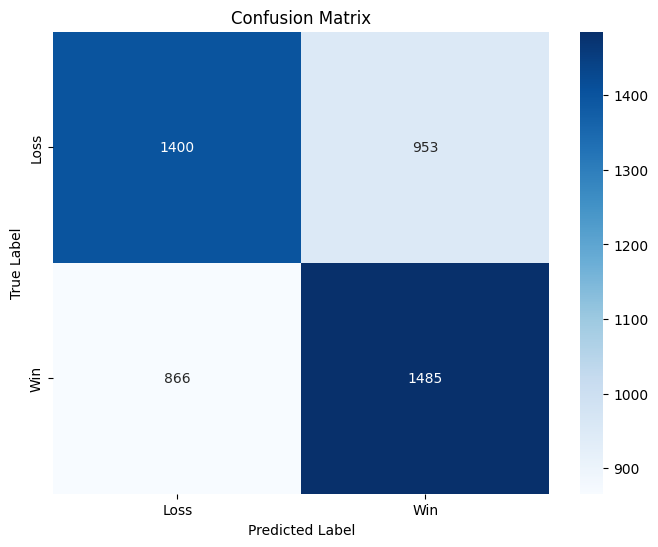

----------------------------------------------------


In [28]:
rr = RidgeClassifier(alpha =1)

predictors = get_predictors(full[selected_columns_full], full["target"], rr)
predictions = backtest(full,rr, predictors)
print_accuracy(predictions["prediction"], predictions["actual"],"RidgeClassifier with rolling")

Random Forest

have got predictors
Progress: 0/2
Progress: 1/2
This is the result for Random Forest with rolling:
The accuracy score is: 0.6181972789115646
THe MSE is: 0.3818027210884354


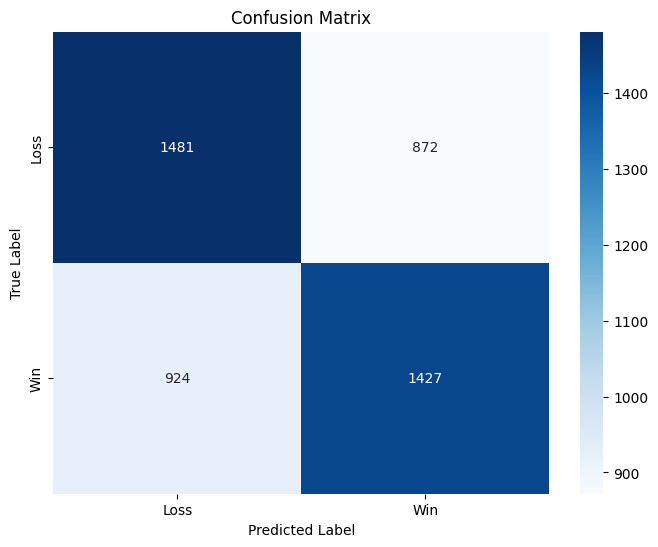

----------------------------------------------------


In [29]:
# Define the model
model = RandomForestClassifier(
    n_estimators=50, 
    max_depth=5, 
    min_samples_split=3,
    min_samples_leaf=2, 
    max_features=0.3,
    random_state=42
)

# Get predictors and train model with rolling
predictors = get_predictors(full[selected_columns_full], full["target"], model)
predictions = backtest(full, model, predictors)
print_accuracy(predictions["prediction"], predictions["actual"], "Random Forest with rolling")

XGBoost

have got predictors
Progress: 0/2
Progress: 1/2
This is the result for XGB with rolling:
The accuracy score is: 0.6073554421768708
THe MSE is: 0.39264455782312924


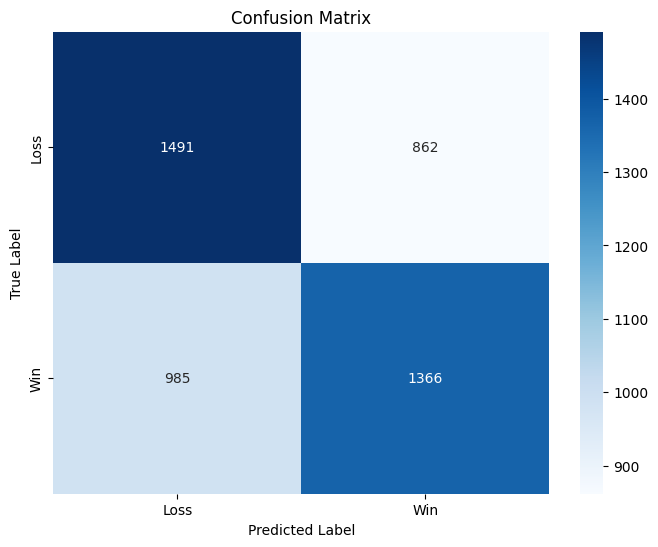

----------------------------------------------------


In [60]:
model = xgb.XGBClassifier(objective = "binary:logistic",
                          learning_rate=0.005, 
                          max_depth=3, 
                          n_estimators=30,
                          colsample_bytree=0.3,
                          min_child_weight=0.3, 
                          reg_alpha=0.3,
                      )

predictors = get_predictors(full[selected_columns_full], full["target"], model)
predictions = backtest(full,model, predictors)
print_accuracy(predictions["prediction"], predictions["actual"],"XGB with rolling")

LightGBM

have got predictors
Progress: 0/2
Progress: 1/2
This is the result for LightGBM with rolling:
The accuracy score is: 0.5990646258503401
THe MSE is: 0.40093537414965985


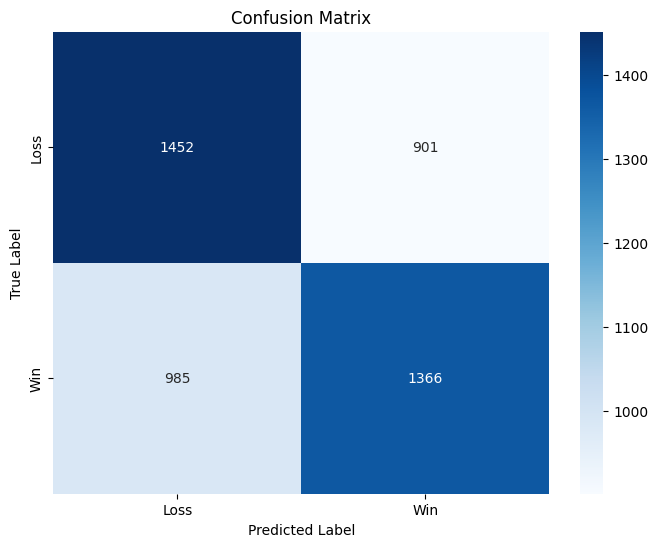

----------------------------------------------------


In [31]:
model = lgb.LGBMClassifier(
    boosting_type="gbdt",
    num_leaves=15,           # Controls complexity of trees
    max_depth=5,             # Maximum depth of each tree
    learning_rate=0.01,      # Learning rate
    n_estimators=30,        # Number of boosting iterations
    reg_alpha=0.3,           # L1 regularization
    reg_lambda=0.3,          # L2 regularization
    random_state=42,
    force_col_wise=True,
    verbose=-1
)

predictors = get_predictors(full[selected_columns_full], full["target"], model)
predictions = backtest(full, model, predictors)
print_accuracy(predictions["prediction"], predictions["actual"], "LightGBM with rolling")

LSTM

In [32]:
# Set the number of timesteps to look back
timesteps = 5

# Assuming 'df' is your DataFrame with features and binary target ('result' column)
X = df[selected_columns_df].values  # Features
y = df['target'].values  # Target (binary outcome)

# # Normalize features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Prepare data as sequences
X_lstm = []
y_lstm = []

for i in range(timesteps, len(X)):
    X_lstm.append(X[i-timesteps:i])  # Sequence of 5 past games
    y_lstm.append(y[i])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
fold = 1
all_fold_accuracies = []

# Iterate through each split
for train_index, val_index in tscv.split(X_lstm):
    X_train, X_val = X_lstm[train_index], X_lstm[val_index]
    y_train, y_val = y_lstm[train_index], y_lstm[val_index]
    
    # Build a new LSTM model for each fold
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=32, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model on the current training fold
    print(f"Training fold {fold}...")
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    
    # Evaluate the model on the validation fold
    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    print(f"Fold {fold} - Validation Accuracy: {val_acc:.4f}")
    all_fold_accuracies.append(val_acc)
    
    fold += 1

# Print average accuracy across folds
print(f"Average validation accuracy across folds: {np.mean(all_fold_accuracies):.4f}")


Training fold 1...


/opt/homebrew/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Fold 1 - Validation Accuracy: 0.5013
Training fold 2...
Fold 2 - Validation Accuracy: 0.5142
Training fold 3...
Fold 3 - Validation Accuracy: 0.4939
Training fold 4...
Fold 4 - Validation Accuracy: 0.5027
Training fold 5...
Fold 5 - Validation Accuracy: 0.4960
Average validation accuracy across folds: 0.5016


# Conclusion

In this project, I evaluated multiple models to predict NBA game results, including RidgeClassifier, Random Forest, XGBoost, LightGBM, and LSTM. RidgeClassifier and Random Forest achieved the highest accuracy, with scores of 0.613 and 0.618, respectively. While Random Forest offers slightly better performance, its computational time is significantly higher, making RidgeClassifier a preferable option for achieving similar results with greater efficiency.

Advanced models like XGBoost and LightGBM yielded around 0.6 accuracy, but their extended computation time may limit practicality. These results suggest room for optimization, potentially by enhancing preprocessing or tuning parameters to accelerate computation without sacrificing accuracy.

The LSTM model, while computationally efficient, achieved only 0.5 accuracy. This suggests that LSTM may not be well-suited to this task or may require adjustments, such as tuning hyperparameters or adding engineered features to better capture sequential patterns.

It also seems likely that the current data may not fully capture the complex patterns needed to accurately predict game outcomes. An accuracy of around 0.6 for most models indicates that there is predictive power, but it’s limited. This suggests that either:

1. **Important features are missing**: The data may not include key factors that strongly influence game outcomes, such as player stats, player injuries, lineup stats, recent performance trends, or other contextual factors that could add predictive strength.

2. **Feature quality needs improvement**: The existing data may benefit from further feature engineering. Creating features that reflect recent team form, specific player contributions, or opponent characteristics might better capture game-specific nuances.

3. **Data quantity**: While 8,898 games is substantial, time-series predictions often benefit from more extensive historical data, especially if this data can include finer-grained information, like specific player stats, game location, and schedule-related factors.

**Further Improvement that could be done:**  
To improve accuracy and efficiency, we could:
- Experiment with feature engineering, such as creating new indicators or aggregating statistics to help capture relevant trends.
- Add more features to capture the patterns needed to predict game results.
- Use dimensionality reduction techniques (like PCA) for models with high complexity to speed up training without significantly compromising accuracy.
- Consider hyperparameter tuning, especially with Random Forest and boosting algorithms, to balance the trade-off between accuracy and computation time.